In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

# state the location of csv
mouse_path = os.path.join(".", "data", "Mouse_metadata.csv")
results_path = os.path.join(".", "data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(results_path)

# join the two table using merge()
df_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])
df_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<font size = "5">__Number of unique mouse for merged Dataframe__</font>

In [19]:
# display the number of unique mouse id
# series.nunique() will give that number of unique items in the list so need to make the column as a list first
df_complete[["Mouse ID"]].nunique()

Mouse ID    249
dtype: int64

In [20]:
# df.duplicated() identified all the duplicate and display as true/false (array from)
# df[true/false array] -> true will display and false will skip
df_complete[df_complete.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# remove the duliplcates timepoint from the same mouse ID 
# using df.drop_duplicates(), remove dup based on all column with didnt specify subset
df_modify = df_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])
df_modify.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<font size = "5">__Number of unique mouse__</font>

In [22]:
# number of unique mouse in modified dataframe
df_modify[["Mouse ID"]].nunique()

Mouse ID    249
dtype: int64

<font size = "6">__Summary Statistics__</font>

In [23]:
# grouping all the individual drug using groupby
drug_grp = df_modify.groupby("Drug Regimen")

# the tumour volume for each group calucatoin: mean, median, variance, SD, and SEM 
avg_tumour = drug_grp["Tumour Volume (mm3)"].mean()
med_tumour = drug_grp["Tumour Volume (mm3)"].median()
var_tumour = drug_grp["Tumour Volume (mm3)"].var()
sd_tumour = drug_grp["Tumour Volume (mm3)"].std()
SEM_tumour = drug_grp["Tumour Volume (mm3)"].sem()

# join all the results togeterand 
summary = pd.concat([avg_tumour,
                    med_tumour,
                    var_tumour,
                    sd_tumour,
                    SEM_tumour], 
                    axis= "columns", sort=False
                    )
# removing the index title
summary.index.name= None
# rename column using list because all the column name are the same
summary.columns = ["Tumour Volume (Mean)", 
                    "Tumour Volume (Median)", 
                    "Tumour Volume (Variance)", 
                    "Tumour Volume (STD)", 
                    "Tumour Volume (SEM)"]
summary

,Tumour Volume (Mean),Tumour Volume (Median),Tumour Volume (Variance),Tumour Volume (STD),Tumour Volume (SEM)
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


<font size = "6">__Bar Charts__</font>

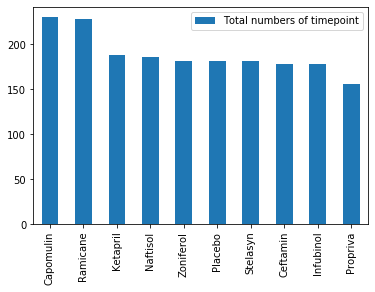

In [24]:
# generate a new df for number of timepoint in each drug group
timepoint_sum = pd.concat([drug_grp["Timepoint"].count()], axis= "columns", sort= False)
timepoint_sum.columns = ["Total numbers of timepoint"]
# sort by the total numbers of timepoint
timepoint_sum = timepoint_sum.sort_values(by= "Total numbers of timepoint", ascending= False)
# plot bar graph using df.plot
timepoint_sum.plot.bar()

Text(0, 0.5, 'Total number of timepoint')

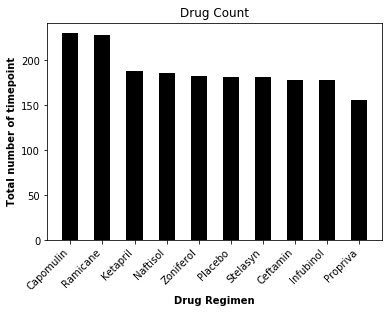

In [25]:
# create bar chart and modification
plt.bar(timepoint_sum.index, timepoint_sum["Total numbers of timepoint"], width= 0.5, color = "black")
plt.xlabel("Drug Regimen", fontweight="bold")
# rotate the x-axis into 45 degree and align it to the end of the text
plt.xticks(rotation=45, ha='right')
plt.title("Drug Count")
plt.ylabel("Total number of timepoint", fontweight="bold")

<font size = "6">__Pie Charts__</font>

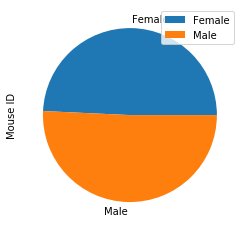

In [26]:
# calculate the number of male and female
grp_gender = df_modify.groupby("Sex").count()
grp_gender.plot.pie(y="Mouse ID")

Text(0.5, 1.0, 'The Distribution of female and male mice')

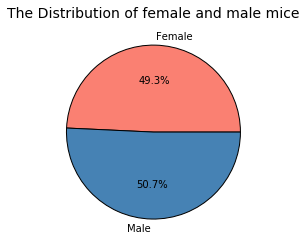

In [27]:
colour = ["salmon", "steelblue"]
# plt.pie(list for data, labels=, colors=) 
# the autopct = "%1.1f%%" is for showing percentage
# wedgeprops = modify the edge colour
plt.pie(grp_gender["Mouse ID"], labels= grp_gender.index,
        autopct= "%1.1f%%",
        colors= colour, wedgeprops={"edgecolor": "black", 'linewidth': 1})
plt.title("The Distribution of female and male mice", fontsize= "14")

In [28]:
# select the four drug regimens 
# df["column"].isin([texts needed]) -> select the cells with the text -> showing true/false
# then df.loc[] to filter out the true with (all columns) using :
top4treat = df_modify.loc[df_modify["Drug Regimen"].isin(["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]),:]
top4treat = top4treat.reset_index(drop= True)
# create a selection of table using groupby: grouping both top 4 drugs and mouse id 
# and then extract the last timepoint using .max()
grp_mouseID = top4treat.groupby(["Drug Regimen", "Mouse ID"])
maxTP = grp_mouseID["Timepoint"].max()
df_lastTP = pd.concat([maxTP], axis= "columns", sort= False)
# merge the groupby table back to the orignal table
df_lastTP_merge = pd.merge(df_modify, df_lastTP, how= "right", on=["Drug Regimen", "Mouse ID", "Timepoint"])
df_lastTP_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [29]:
ls_treat = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
ls_tumour = []
ls_outlier = []
outlier = {}
boxplot_dic = {}
# the whole for loop will loop four times
# df_lastTP_merge["column"] == drug -> give out a list of True/false and then filter out the tumour volume
# after getting the first list of tumour size, the list is put into the dictionary with the drug name
for drug in ls_treat:
    ls_tumour = df_lastTP_merge.loc[df_lastTP_merge["Drug Regimen"] == drug, "Tumour Volume (mm3)"]
    boxplot_dic[drug] = ls_tumour
    # calculating interquartile range by using quantile function
    # can also use st.iqr to get the interquartile range
    q1, q3 = ls_tumour.quantile([0.25,0.75])
    upper = q3 + 1.5*st.iqr(ls_tumour) # whiskers = 1.5 by default
    lower = q1 - 1.5*st.iqr(ls_tumour)
    # np.logical_or to compare two different lists (many to many)
    ls_outlier = ls_tumour[np.logical_or(ls_tumour.values < lower, ls_tumour.values > upper)]
    # putting all the results into dictionary
    outlier[drug + str("'s prtential outlier(s)")] = ls_outlier
outlier

{"Ceftamin's prtential outlier(s)": Series([], Name: Tumour Volume (mm3), dtype: float64),
 "Ramicane's prtential outlier(s)": Series([], Name: Tumour Volume (mm3), dtype: float64),
 "Infubinol's prtential outlier(s)": 58    36.321346
 Name: Tumour Volume (mm3), dtype: float64,
 "Capomulin's prtential outlier(s)": Series([], Name: Tumour Volume (mm3), dtype: float64)}

Text(0, 0.5, 'Tumour Volume for the last timepoint (mm)')

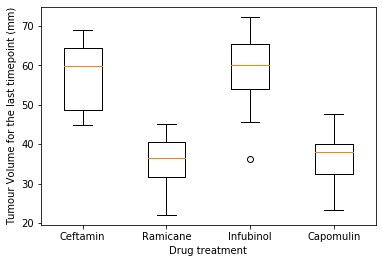

In [30]:
boxplot = plt.boxplot(boxplot_dic.values(), labels= ls_treat)
# another way to get the outlier for the boxplot function return; fliers = outliers,
# all other median, upper and lower bound can be extracted in this way, the code is below:
# [outlier.get_ydata() for outlier in boxplot['fliers']]
plt.xlabel("Drug treatment")
plt.ylabel("Tumour Volume for the last timepoint (mm)")

<font size = "6">__Line and Scatter Plots__</font>

Text(0, 0.5, 'Tumour Volume (mm3)')

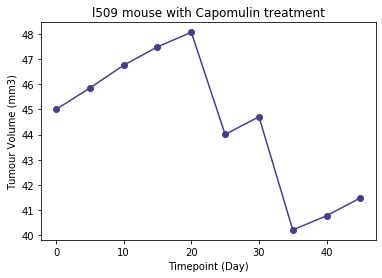

In [31]:
# select the l509 mouse that use the capomulin treatment
Capomulin_df = df_modify.loc[(df_modify["Drug Regimen"] == "Capomulin") & (df_modify["Mouse ID"] == "l509"), 
    ["Mouse ID", "Tumour Volume (mm3)", "Timepoint"]]
plt.plot(Capomulin_df["Timepoint"], Capomulin_df["Tumour Volume (mm3)"], marker= "o", color= "darkslateblue")
plt.title("l509 mouse with Capomulin treatment")
plt.xlabel("Timepoint (Day)")
plt.ylabel("Tumour Volume (mm3)")


Text(0.5, 1.0, 'Weight VS Average tumour volumne')

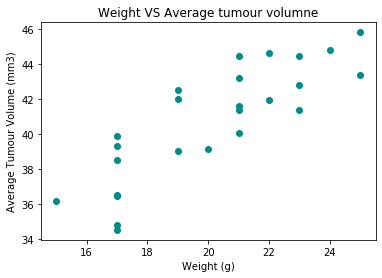

In [32]:
avgtumour_df = df_modify.loc[df_modify["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumour Volume (mm3)"]]
cap_weight_grp = avgtumour_df.groupby(["Weight (g)","Mouse ID"]).mean()
cap_weight_grp = cap_weight_grp.reset_index(drop= False)
plt.scatter(cap_weight_grp["Weight (g)"], cap_weight_grp["Tumour Volume (mm3)"], color= "darkcyan", marker= "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Weight VS Average tumour volumne")

<font size = "6">__Correlation and Regression__</font>

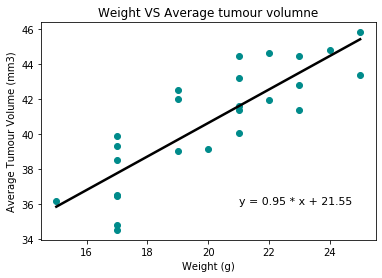

In [42]:
# calulate slope and constant
slope, constant= np.polyfit(cap_weight_grp["Weight (g)"], cap_weight_grp["Tumour Volume (mm3)"], deg = 1)

# create a line from x-axis 15 to 25 with 2 point
x_num = np.linspace(15, 25, num=2)

# Plot scatter plot
plt.scatter(cap_weight_grp["Weight (g)"], cap_weight_grp["Tumour Volume (mm3)"], color= "darkcyan", marker= "o")
# Plot the regression line
plt.plot(x_num, constant + slope * x_num, color="black", linewidth= 2.5)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
# state the linear regression equlation on the plot y = slope* x + constant
plt.text(21, 36, f"y = {slope:.2f} * x + {constant:.2f}", fontsize= 11)
plt.title("Weight VS Average tumour volumne");